# ----------------------------------------------Project 3---------------------------------------------------


###    An health care system has collected the patient diagnostic measurement which is available in “diagnostic_dataset.csv”.  Use this data to build a machine learning model to predict whether the patient is diseased or not. ‘disease’ can be considered as the target variable.
**Note:** If ‘disease ‘ is 1 the patient is diseased else if it is 2 patients is not diseased.


### Problem statement:
You as a data scientist help the insurance company by performing the following tasks:

In [1]:
#import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from matplotlib import pyplot
%matplotlib inline
from scipy.stats import skew
import pylab
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the Given Data and Initilize to the Variable
df = pd.read_csv('diagnostic_dataset.csv')
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### 1. check if any column has missing values. Use regression technique to impute the missing values by choosing the appropriate independent variable.


In [3]:
# checking null values
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Disease                       0
dtype: int64

In [4]:
# using mean imputation to handle missing values
missing_values=['Albumin_and_Globulin_Ratio']
for i in missing_values:
    df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()
#checking null values again
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Disease                       0
dtype: int64

### 2.Show the class distribution of all independent variables.

In [5]:
#using single index
table_single = pd.pivot_table(df,index=['Disease'])
table_single

,Age,Alamine_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio,Alkaline_Phosphotase,Aspartate_Aminotransferase,Direct_Bilirubin,Total_Bilirubin,Total_Protiens
Disease,,,,,,,,,
1,46.153846,99.605769,3.060577,0.914337,319.007212,137.699519,1.923558,4.164423,6.459135
2,41.239521,33.652695,3.344311,1.028588,219.754491,40.688623,0.396407,1.142515,6.543114


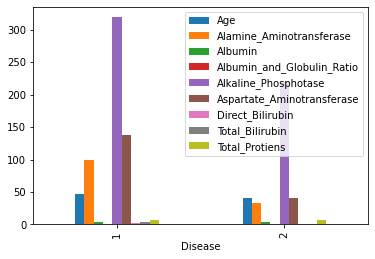

In [6]:
table_single.plot(kind='bar');

In [7]:
#using multi index
table_multi = pd.pivot_table(df,index=['Gender','Disease'])
table_multi

Age  Alamine_Aminotransferase   Albumin  \
Gender Disease                                                  
Female 1        43.347826                 67.554348  3.231522   
       2        42.740000                 29.740000  3.350000   
Male   1        46.950617                108.706790  3.012037   
       2        40.598291                 35.324786  3.341880   

                Albumin_and_Globulin_Ratio  Alkaline_Phosphotase  \
Gender Disease                                                     
Female 1                          0.917903            356.173913   
       2                          1.006141            203.280000   
Male   1                          0.913324            308.453704   
       2                          1.038180            226.794872   

                Aspartate_Aminotransferase  Direct_Bilirubin  Total_Bilirubin  \
Gender Disease                                                                  
Female 1                         89.260870          1.381522         3.092391   
       2                         31.840000          0.268000         0.906000   
Male   1                        151.453704          2.077469         4.468827   
       2                         44.470085          0.451282         1.243590   

                Total_Protiens  
Gender Disease                  
Female 1              6.693478  
       2              6.580000  
Male   1              6.392593  
       2              6.527350

Text(0.5, 0.98, 'histogram plots of all independent variables')

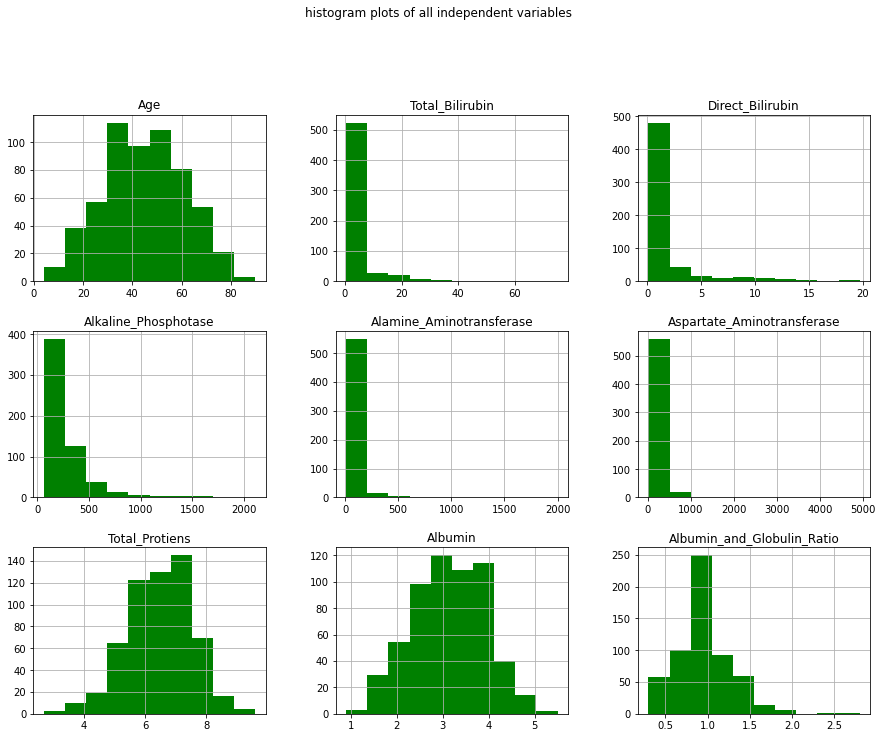

In [8]:

idv=df.drop(columns=['Disease'])
idv.hist(layout=(4,3),color='green', figsize=(15,15), grid=True)
plt.suptitle("histogram plots of all independent variables")

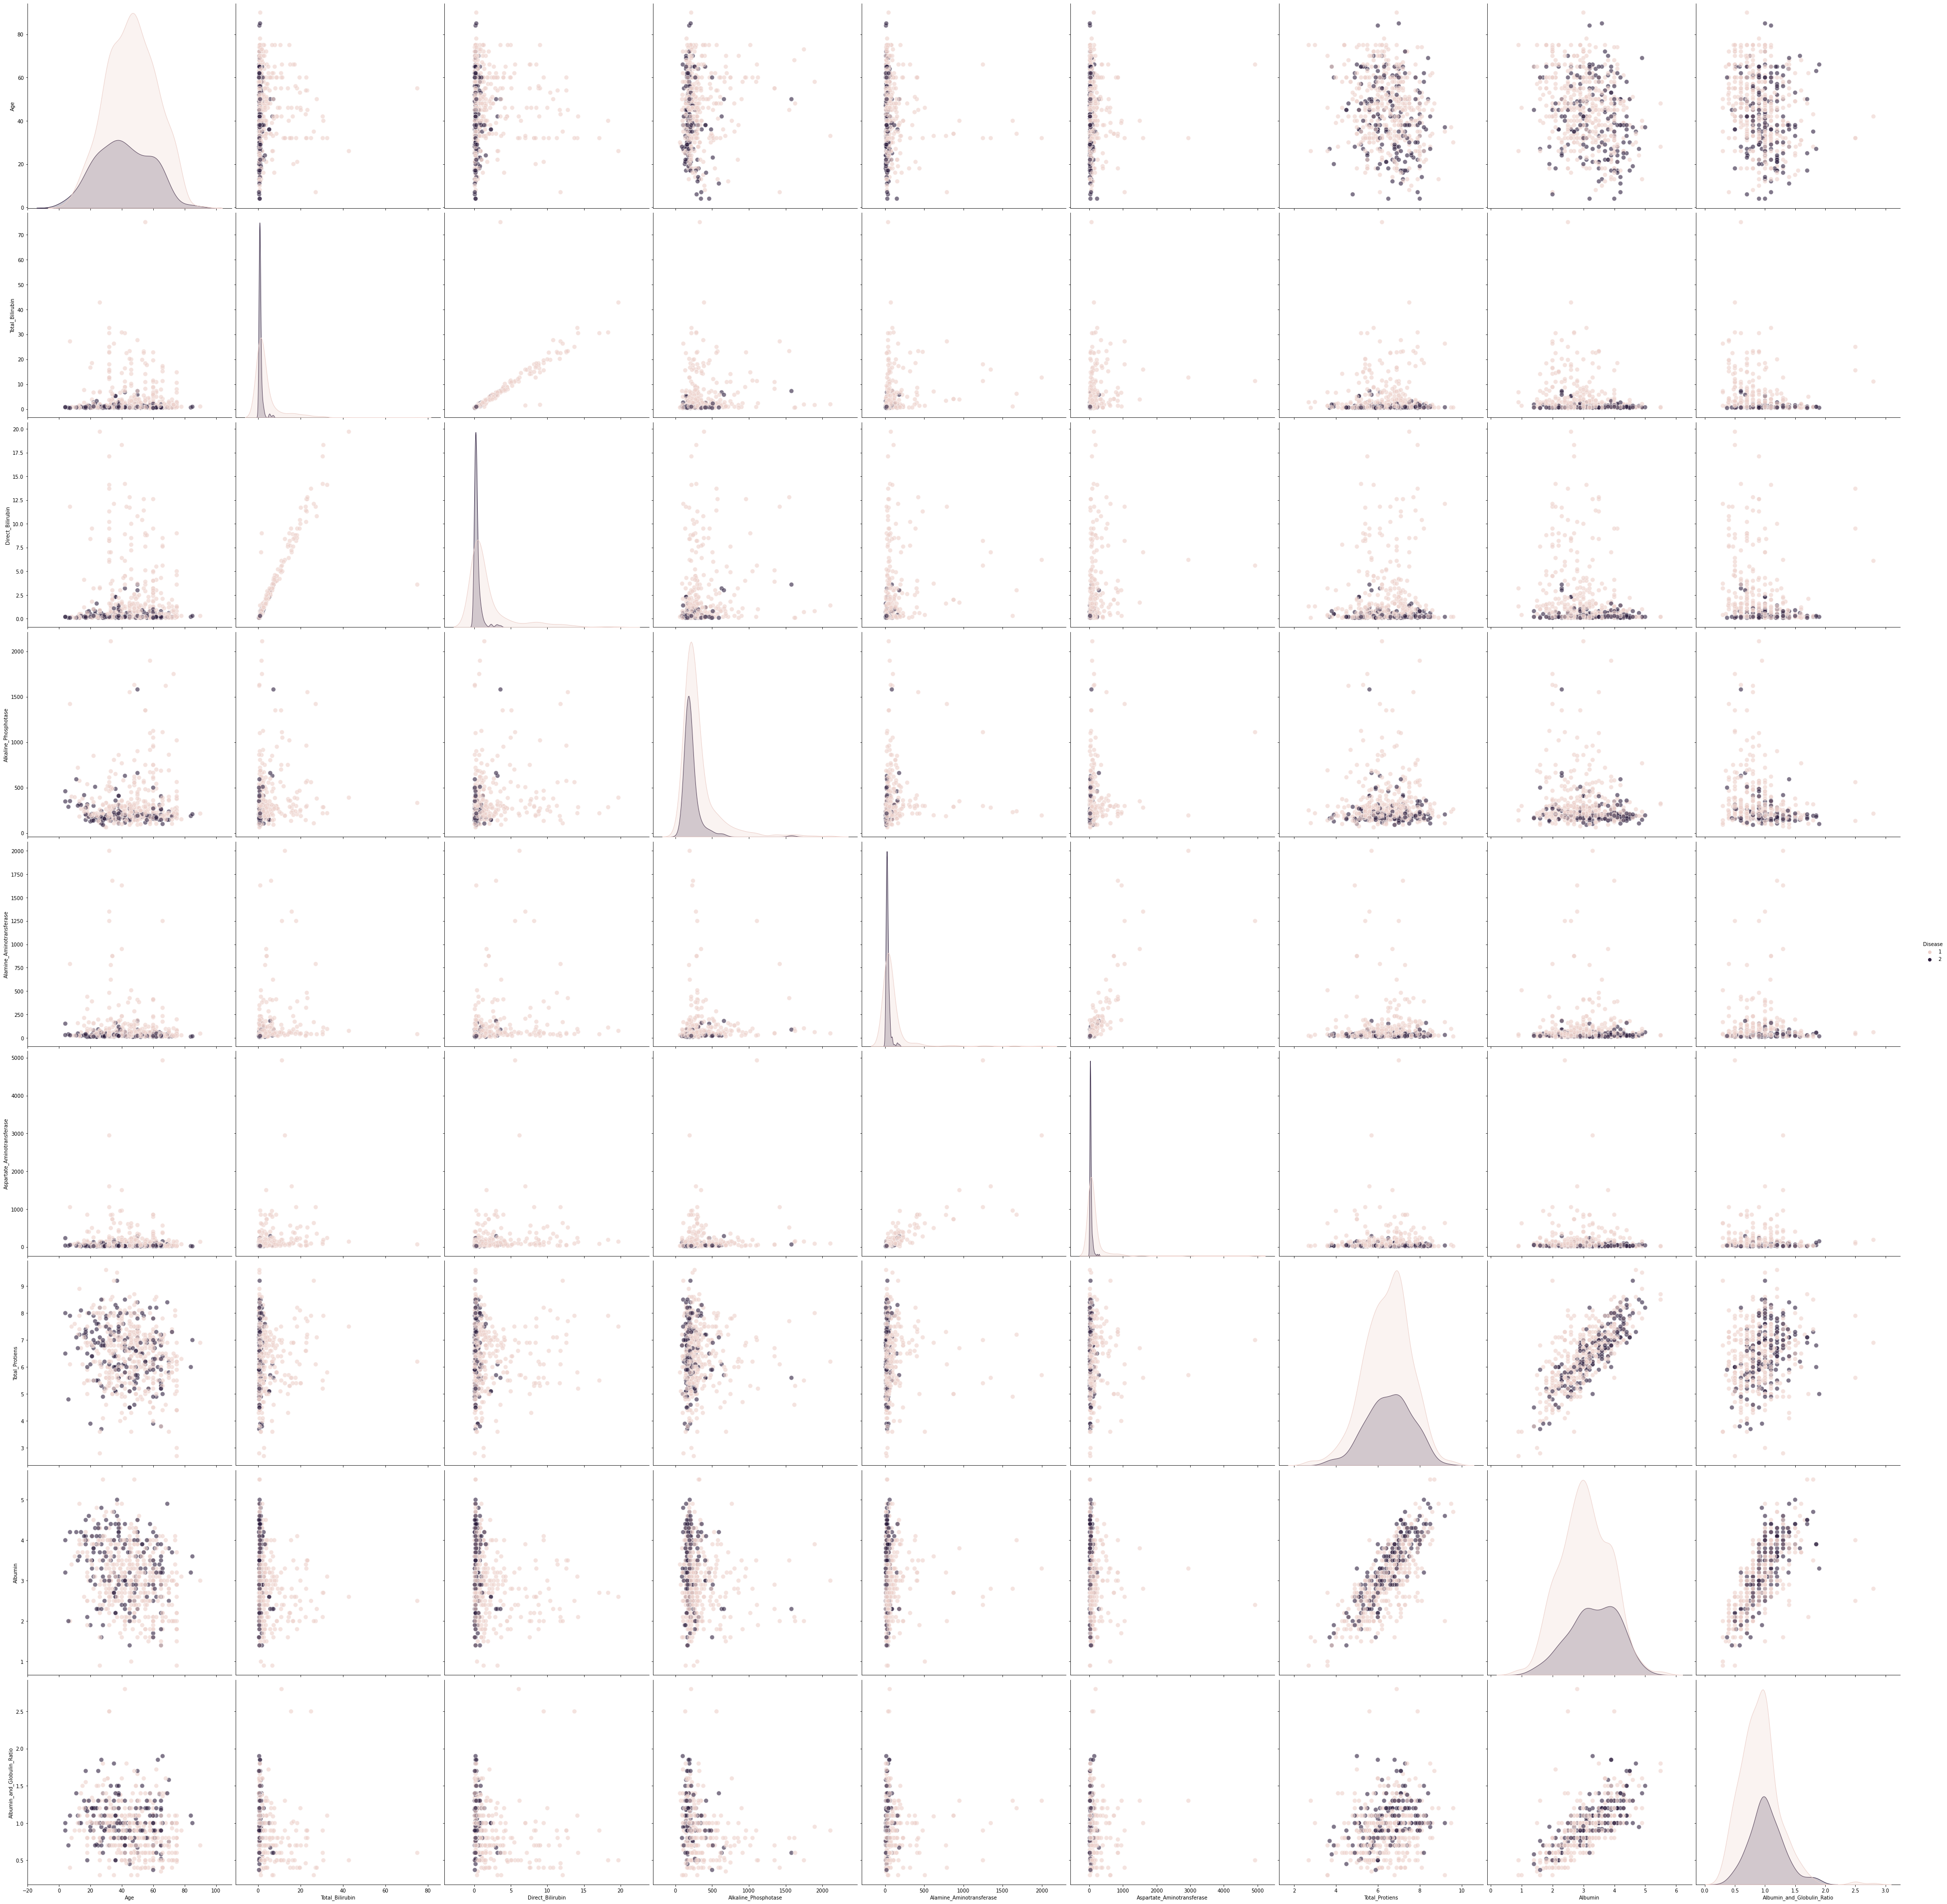

In [9]:
# Drop the non-transformed columns
sns.pairplot(df, hue = 'Disease',diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80},
             height = 6)

### 3.Do a normality test of all variables graphically.


### **Normality Test :** 
                 The normality test is used to determine whether the sample data is derived from the normal distribution of a population.

### **Histogram :**
                  Histogram is a graphical representation of data in bars of having different heights.

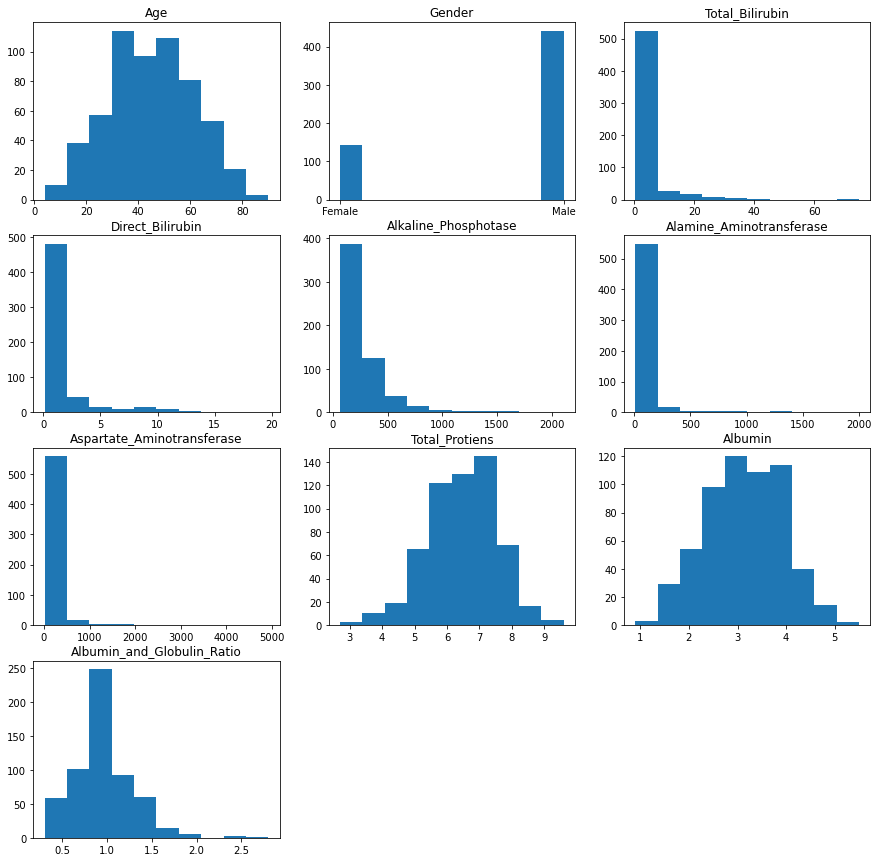

In [10]:
# By using histogram graphical representation the normality test of all variables are obtained from the given data frame. 
plt.figure(figsize=(15,15))
plt.subplot(4,3,1)
plt.hist(df.loc[:,"Age"],bins=10)
plt.title("Age")
plt.subplot(4,3,2)
plt.hist(df.loc[:,"Gender"], bins=10)
plt.title("Gender")
plt.subplot(4,3,3)
plt.hist(df.loc[:,"Total_Bilirubin"], bins=10)
plt.title("Total_Bilirubin")
plt.subplot(4,3,4)
plt.hist(df.loc[:,"Direct_Bilirubin"], bins=10)
plt.title("Direct_Bilirubin")
plt.subplot(4,3,5)
plt.hist(df.loc[:,"Alkaline_Phosphotase"], bins=10)
plt.title("Alkaline_Phosphotase")
plt.subplot(4,3,6)
plt.hist(df.loc[:,"Alamine_Aminotransferase"], bins=10)
plt.title("Alamine_Aminotransferase")
plt.subplot(4,3,7)
plt.hist(df.loc[:,"Aspartate_Aminotransferase"], bins=10)
plt.title("Aspartate_Aminotransferase")
plt.subplot(4,3,8)
plt.hist(df.loc[:,"Total_Protiens"], bins=10)
plt.title("Total_Protiens")
plt.subplot(4,3,9)
plt.hist(df.loc[:,"Albumin"], bins=10)
plt.title("Albumin")
plt.subplot(4,3,10)
plt.hist(df.loc[:,"Albumin_and_Globulin_Ratio"], bins=10)
plt.title("Albumin_and_Globulin_Ratio")
plt.show()

**From the above Histogram graphical repesentation,we conclude that  "Age","Total_Protiens" and "Albumin" column variables are Normally Distributed.** 

**Alkaline_Phosphotase, Alamine_Aminotransferase , Aspartate_Aminotransferase and Albumin_and_Globulin_Ratio variables are Right skewed.**

### 4. Check if any independent variables are correlated. If correlated take a suitable action.

### **Pearson Correlation Coefficient Technique :**

### **Correlation :**
           Correlation is a statistical measure. Correlation explains how one or more variables are related to each other.  Correlation gives the Strength and Direction.
#####          **Direction :** 
           1) Positively correlated (+1)
           2) Negatively correlated (-1)
           3) No correlation (0)
#####           **Strength :**
           Strength gives the magnitude to the direction. i.e at what value the variables are positively or negatively correlated.

In [11]:
df2 = df.drop(['Disease'],axis=1)
df2

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00


In [12]:
# The function corr() gives the quick correlation among the columns
df2=df
df2.corr()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319
Disease,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162319,1.000000


<AxesSubplot:>

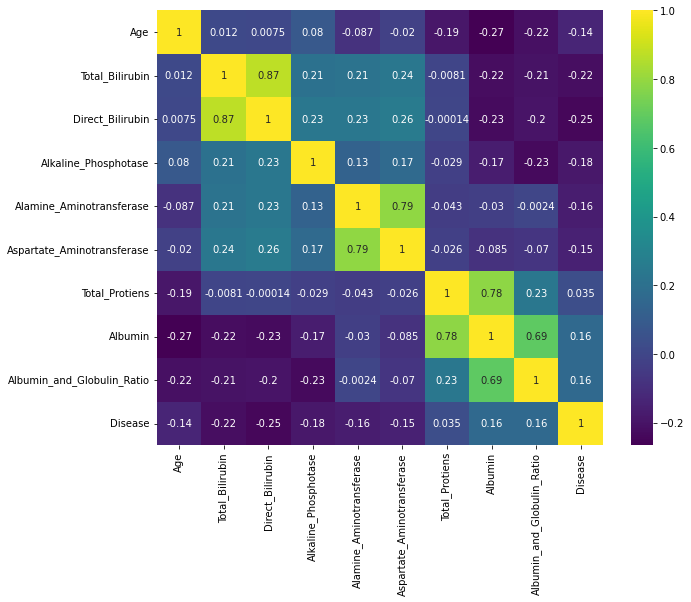

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(),annot=True,cmap='viridis')

###  If it is correlated take a suitable action.

In [14]:
# with the following function we can select highly correlated features.
# the below code is also used to remove the first selected highly correlated feature with other feature.

def correlation(dataset, threshold):
    col_corr= set() #Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr        

In [15]:
corr_features = correlation(df2, 0.8) # This function checks the features(variables) are highly correlated with other feature.
len(set(corr_features)) # This line of code gives the how many independent variables are highly correlated with other variable.

1

In [16]:
corr_features

{'Direct_Bilirubin'}

In [17]:
df3 = df2.drop(corr_features,axis=1) # Here we are dropping that dummy variable from the data set .
df3

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
0,65,Female,0.7,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,184,29,32,6.8,3.4,1.00,1


### 5.	Check if the independent variables have outliers and check if the variables are skewed. If skewed perform appropriate transformation.

###### Check if the independent variables have outliers

### **Outlier :**
    An Outlier is a data point in a data set that is distant from all the other observations. A data point that lies outside the overall distribution of the dataset.

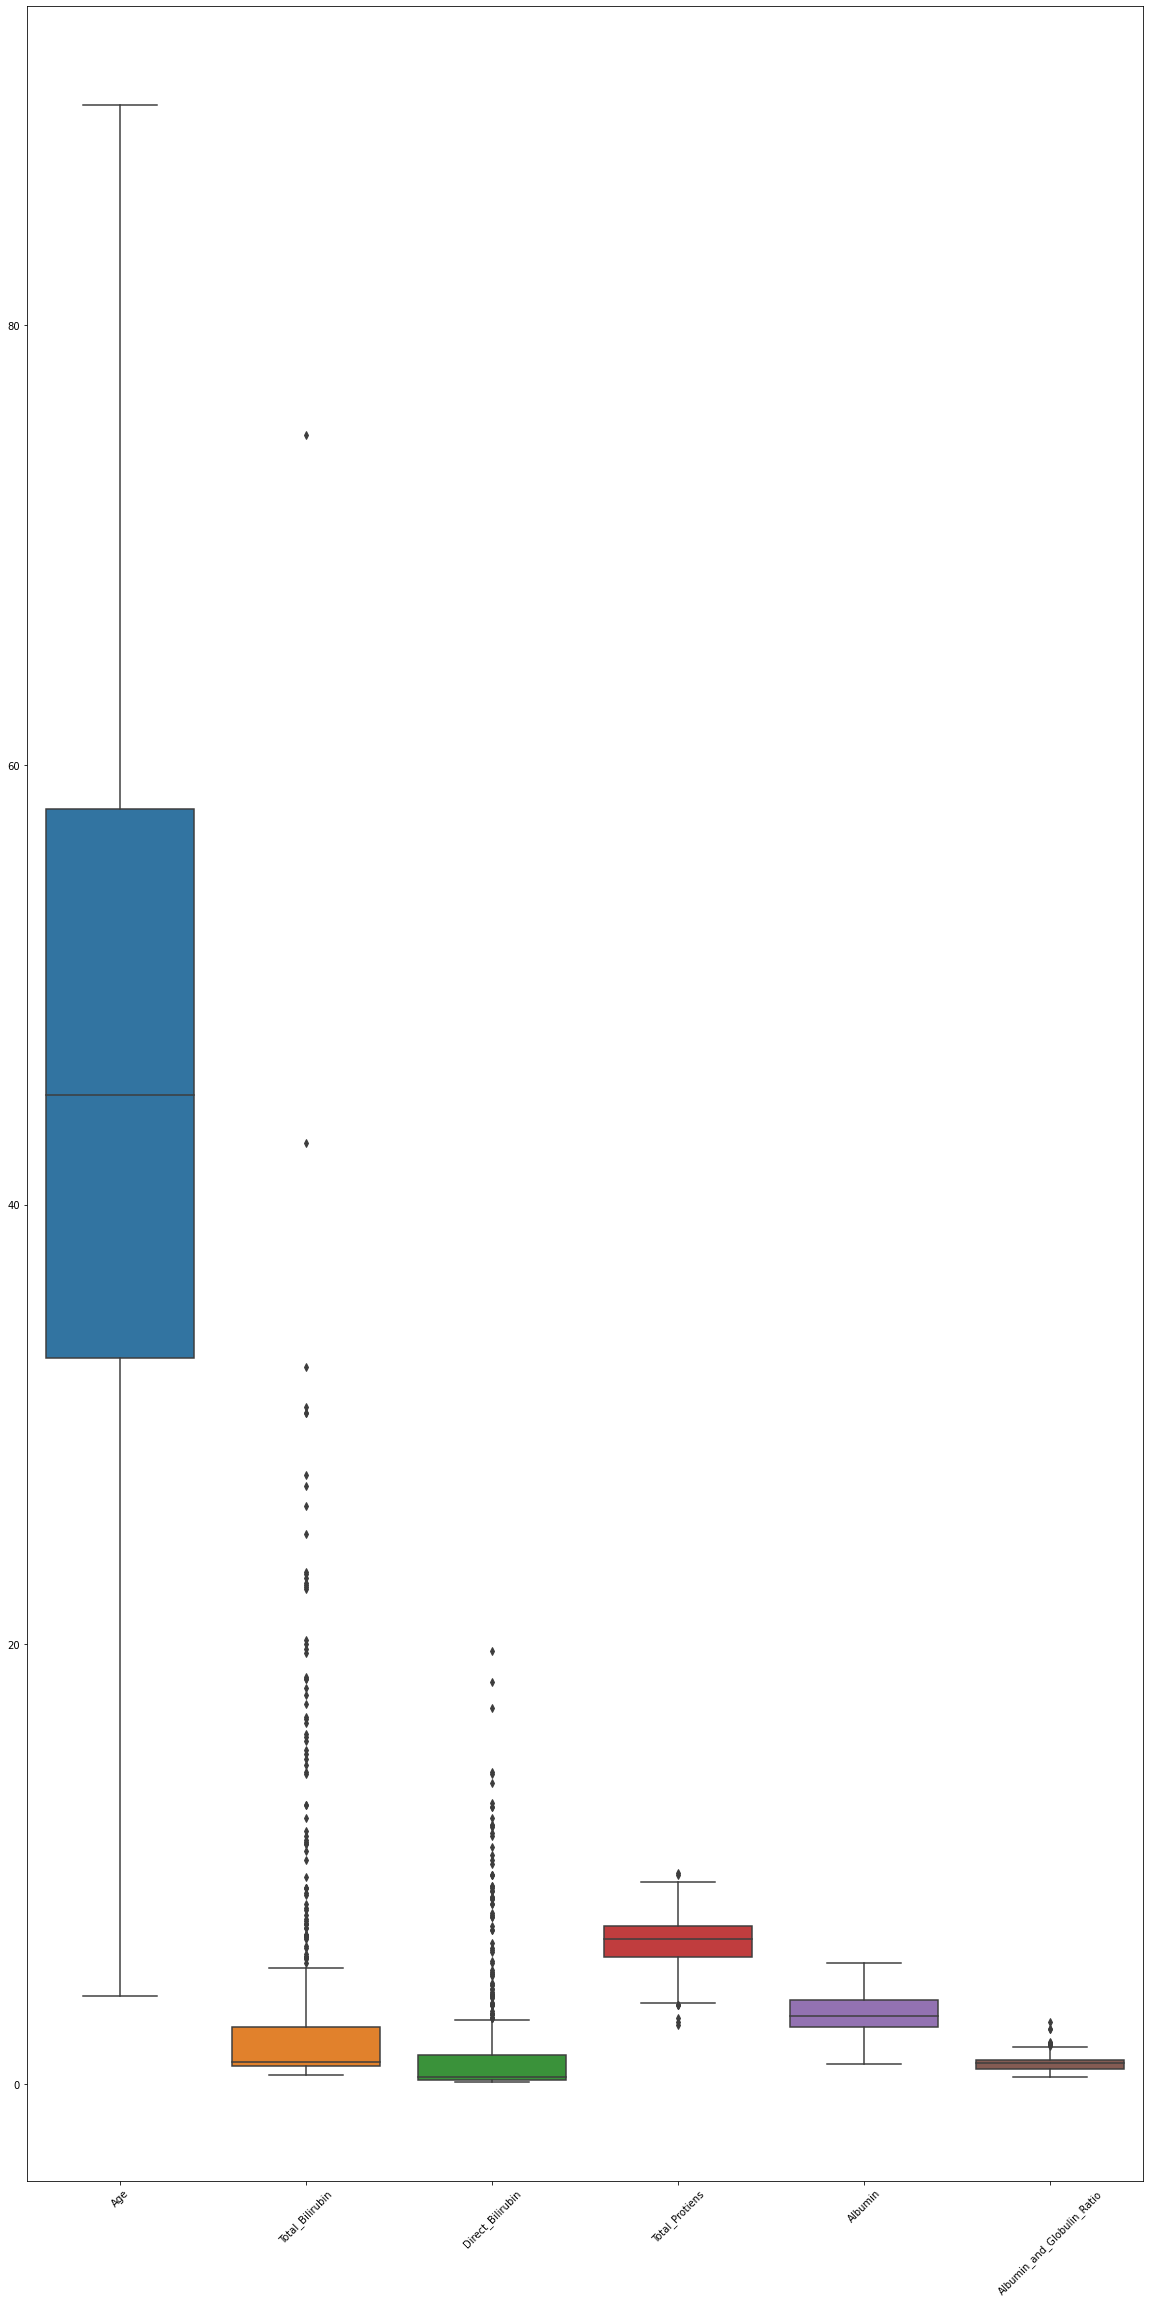

In [18]:
# Here we are checking the outliers for the given data set without the below three variables.
# For that we use drop function to drop the below three variables.
df_ =df2.drop(columns=['Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Disease'])
plt.figure(figsize=(20,40))
sns.boxplot(data=df_)  # Box plot is a data visualization technique in the seaborn library. Its is used to detect the outliers.
xt=plt.xticks(rotation=45)

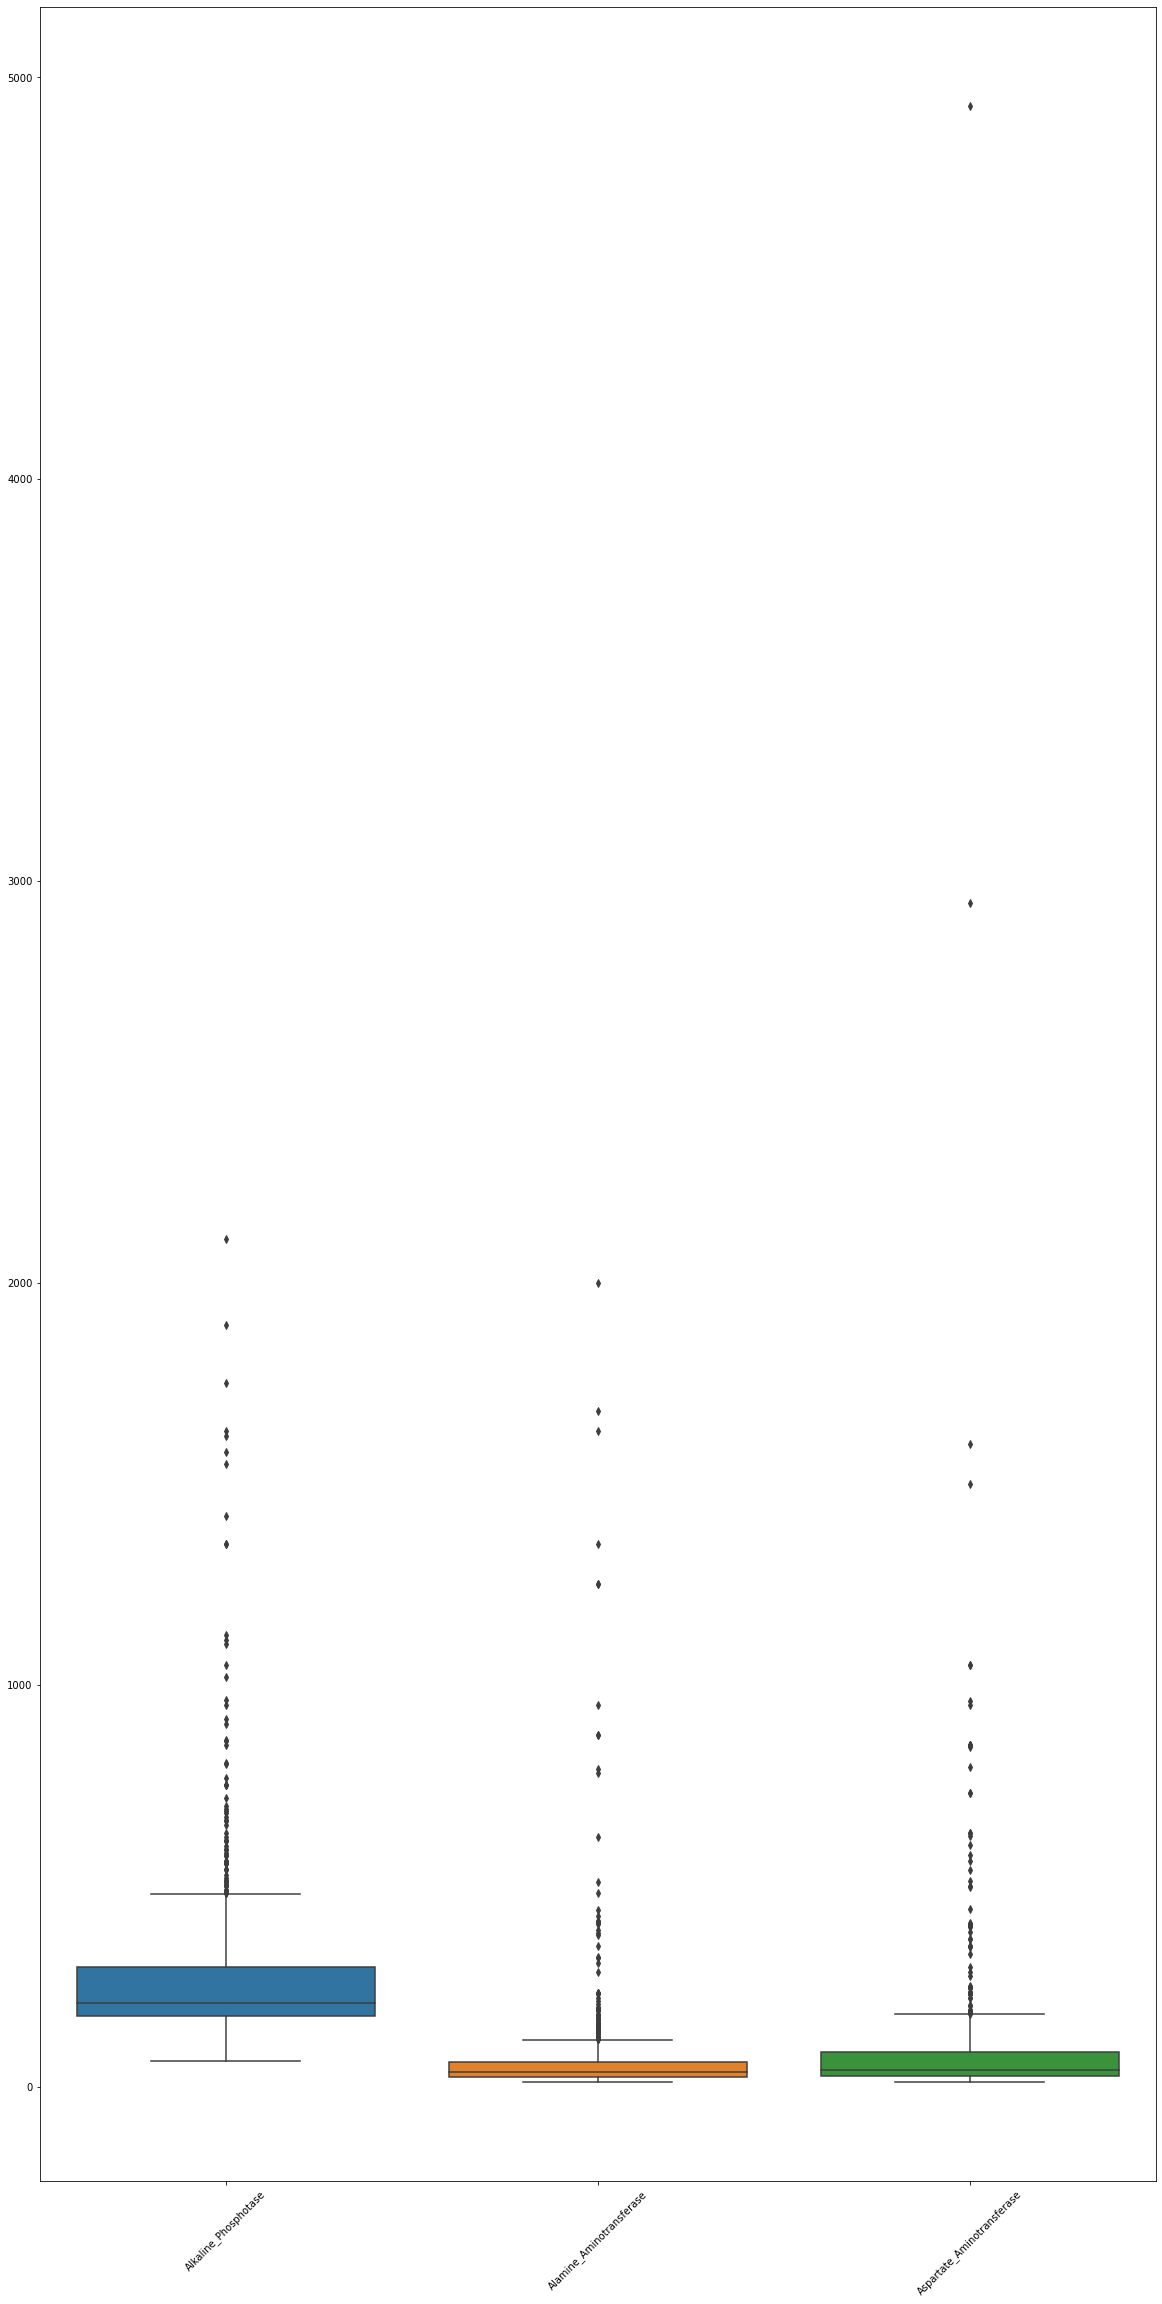

In [19]:
# Here we are checking the outliers in the remaining columns that is from 3rd col to 6th column.
df_1=df2.iloc[: ,4:7]
plt.figure(figsize=(20,40))
sns.boxplot(data=df_1)  #Box plot data visualization technique to detect the outliers.
xt=plt.xticks(rotation=45)

####  check if the variables are skewed

#### **Skewness :**
     Skewness measure the distribution of the data. It indicate weather the data is distributed symmetric or not. If the data is distributed symmetric means the data is normally distributed.
#### **Types of Skewness :**
     1) Symmetric
     2) Positive skewness
     3) Negative skewness

In [20]:
# For checking the skewness , the data must be in numerical format of columns.So, here we are dropping the Gender column.
df4=df2.drop('Gender',axis=1)
df4

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [21]:
# The function skew() gives  how much of the data is skewed in among the three types of skewness. ie. positive, negative and symmetric. 
df4.skew()

Age                           -0.029385
Total_Bilirubin                4.907474
Direct_Bilirubin               3.212403
Alkaline_Phosphotase           3.765106
Alamine_Aminotransferase       6.549192
Aspartate_Aminotransferase    10.546177
Total_Protiens                -0.285672
Albumin                       -0.043685
Albumin_and_Globulin_Ratio     0.995703
Disease                        0.947140
dtype: float64

We know that the skewness of the data is ranging from -1 to +1. From the above data df5 , we can say that Total_Bilirubin, Direct_Bilirubin , Alkaline_Phosphotase, Alamine_Aminotransferase , Aspartate_Aminotransferase and  Albumin_and_Globulin_Ratio variables are highly skewed (>1).


To overcome this highly skewness, TRANSFORMATION technique is introduced.

Age
-0.0293096531748283


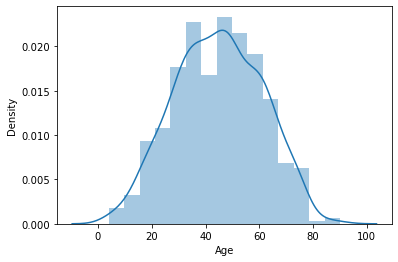

Total_Bilirubin
4.8948385248878825


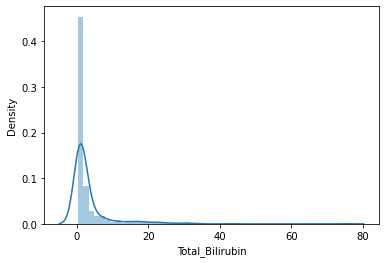

Direct_Bilirubin
3.2041317604378037


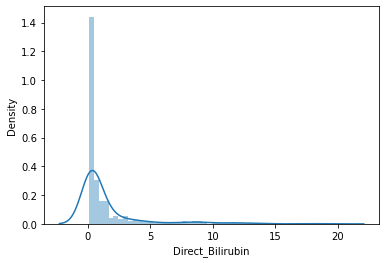

Alkaline_Phosphotase
3.755412227842381


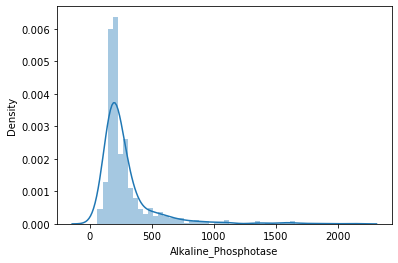

Alamine_Aminotransferase
6.532329464026143


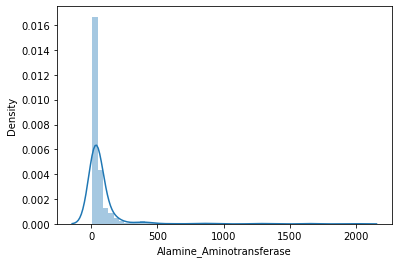

Aspartate_Aminotransferase
10.519023554210735


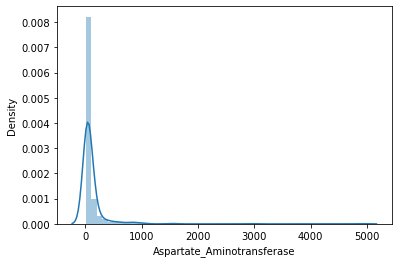

Total_Protiens
-0.28493665487447245


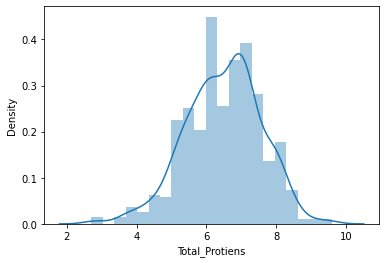

Albumin
-0.043572251735588034


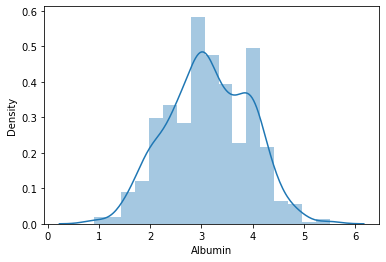

Albumin_and_Globulin_Ratio
0.9931397332044614


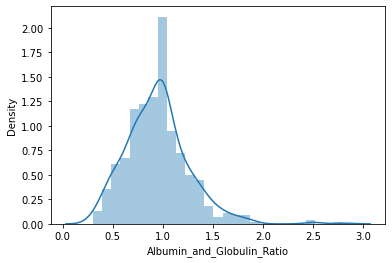

Disease
0.9447011547384523


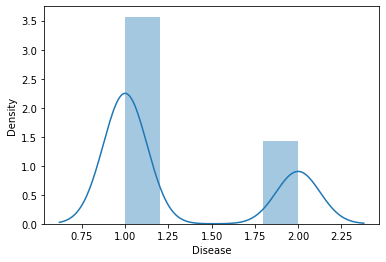

In [22]:
# This is the distplot visualization of code for skewness of the input data (df5).
for col in df4:
    print(col)
    print(skew(df4[col]))
    plt.figure()
    sns.distplot(df4[col])
    plt.show()
    

To overcome this highly skewness, TRANSFORMATION technique is introduced.

### **Transformation Technique :**
      The Technique which is used to overcome the highly skewness of the data either in positve or negative skewness.
### **Types of Transfromation :**
      1) Log Transfromation
      2) square root Transfromation
      

In [23]:
df5 = df4.drop(columns=['Age','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Disease'])
df5

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase
0,0.7,0.1,187,16,18
1,10.9,5.5,699,64,100
2,7.3,4.1,490,60,68
3,1.0,0.4,182,14,20
4,3.9,2.0,195,27,59
...,...,...,...,...,...
578,0.5,0.1,500,20,34
579,0.6,0.1,98,35,31
580,0.8,0.2,245,48,49
581,1.3,0.5,184,29,32


 Here we are using Log Transformation technique, which is used to reduce the highly skewness to the moderate skewness (~Normal Distribution) of the data.

In [24]:
# applying logarithemic function using numpy library.

df6= np.log(df5)
df6

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase
0,-0.356675,-2.302585,5.231109,2.772589,2.890372
1,2.388763,1.704748,6.549651,4.158883,4.605170
2,1.987874,1.410987,6.194405,4.094345,4.219508
3,0.000000,-0.916291,5.204007,2.639057,2.995732
4,1.360977,0.693147,5.273000,3.295837,4.077537
...,...,...,...,...,...
578,-0.693147,-2.302585,6.214608,2.995732,3.526361
579,-0.510826,-2.302585,4.584967,3.555348,3.433987
580,-0.223144,-1.609438,5.501258,3.871201,3.891820
581,0.262364,-0.693147,5.214936,3.367296,3.465736


In [25]:
df6.skew()

Total_Bilirubin               1.318495
Direct_Bilirubin              0.831190
Alkaline_Phosphotase          1.324768
Alamine_Aminotransferase      1.425630
Aspartate_Aminotransferase    1.194898
dtype: float64

From the df7.skew() function , we can say that the highly skewed data is moderately skewed. (approx Normal Distribution).

Total_Bilirubin
1.315100356738154


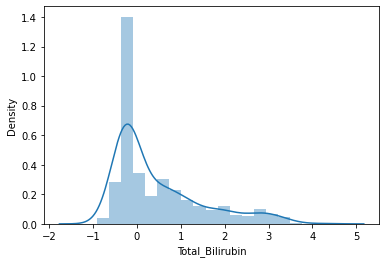

Direct_Bilirubin
0.82905027934287


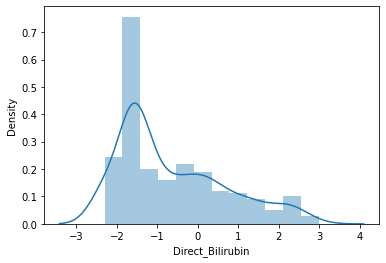

Alkaline_Phosphotase
1.3213570098333647


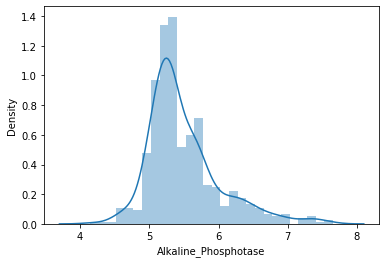

Alamine_Aminotransferase
1.421959661592674


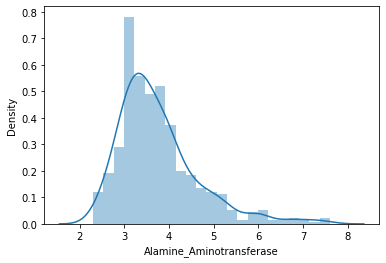

Aspartate_Aminotransferase
1.1918217216071025


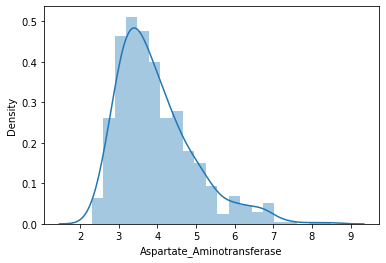

In [26]:
# This is the distplot visualization of code for skewness of the output data (df7).
for col in df6:
    print(col)
    print(skew(df6[col]))
    plt.figure()
    sns.distplot(df6[col])
    plt.show()

From the above distribution plots , we can say that all the independent variables are moderately skewed or Normally Distributed.

## 6) Check if the data is imbalanced. If imbalanced resample it appropriately.

In [27]:
#Checking the data is balanced or imbalanced.
class_count_1,class_count_2 = df3['Disease'].value_counts()
class_count_1,class_count_2

(416, 167)

 From the above data we can say that the data is imbalanced. So, we have to balance the data.

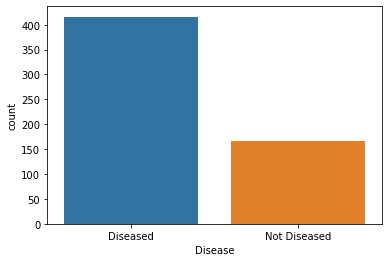

In [28]:
g = sns.countplot(df3['Disease'])
g.set_xticklabels(['Diseased','Not Diseased'])
plt.show()

Total class of 1 and 2: 2    416
1    416
Name: Disease, dtype: int64


<AxesSubplot:title={'center':'Balanced Data'}>

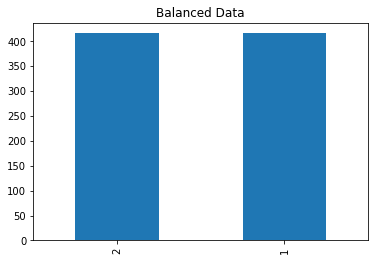

In [29]:
class_1 = df3[df3['Disease']==1]
class_2 = df3[df3['Disease']==2]

#over_sampling
class_2_over = class_2.sample(class_count_1,replace=True)
test_over = pd.concat([class_2_over,class_1],axis = 0)
print('Total class of 1 and 2:',test_over['Disease'].value_counts()) 
test_over['Disease'].value_counts().plot(kind='bar',title='Balanced Data')

From the above observations , we can say that the data is balanced by over_sampling technique.

### 7.	Build Machine learning model- 1:

#### Logistic Regression :
          Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1(yes, success, etc.) or 0(no, failure, etc.).

a. Train a Logistic Regression.

In [30]:
X = test_over.drop(columns=["Disease",'Gender'],axis=1)
y = test_over['Disease']

# Spliting the data in training and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=100)

# Checking the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (665, 8)
Shape of y_train: (665,)
Shape of X_test: (167, 8)
Shape of y_test: (167,)


In [31]:

# Creating the object of the class LogisticRegression
model1 = LogisticRegression()

# Training the model using the training data
model1.fit(X_train,y_train)

# Getting the intercept and the coefficients of the model
print("Intercept:",model1.intercept_,"\nCoefficients:", model1.coef_)

Intercept: [0.79939708] 
Coefficients: [[-0.01516149 -0.26671005 -0.00135069 -0.01242835 -0.00378378  0.08520978
   0.10679805  0.49887819]]


b. Find the train and the test score for model- 1.

In [32]:
# Accuracy = no. of correct predictions / total predictions
# score() method is used to find the accuracy of a model

train_accuracy = model1.score(X_train,y_train)
print("Train accuracy = ", train_accuracy)

test_accuracy = model1.score(X_test,y_test)
print("Test accuracy = ", test_accuracy)

Train accuracy =  0.7428571428571429
Test accuracy =  0.6706586826347305


c. Build confusion matrices for the built model, based on the train data and the test data

In [33]:
#predicting targets based on the model built
train_predictions_1 = model1.predict(X_train)
test_predictions_1 = model1.predict(X_test)

# Creating a confusion matrix on the training data
train_conf_matrix = confusion_matrix(y_train,train_predictions_1)

# Converting the train_conf_matrix into a DataFrame for better readability
pd.DataFrame(train_conf_matrix,columns=model1.classes_,index=model1.classes_)

,1,2
1,205,124
2,47,289


In [34]:
#confusion matrix on the test data
test_conf_matrix = confusion_matrix(y_test,test_predictions_1)
pd.DataFrame(test_conf_matrix,columns=model1.classes_,index=model1.classes_)

,1,2
1,51,36
2,19,61


In [35]:
# Calculating train accuracy calculated from confusion matrix
train_correct_predictions = train_conf_matrix[0][0]+train_conf_matrix[1][1]
train_total_predictions = train_conf_matrix.sum()
train_accuracy = train_correct_predictions/train_total_predictions
print("Train accuracy = ", train_accuracy)

Train accuracy =  0.7428571428571429


In [36]:
# Calculating test accuracy from confusion matrix
test_correct_predictions = test_conf_matrix[0][0]+test_conf_matrix[1][1]
total_predictions = test_conf_matrix.sum()
test_accuracy = test_correct_predictions/total_predictions

print(test_accuracy)

0.6706586826347305


## 8. Build Machine learning model- 2:

#### Support Vector Machine :
        Support Vector Machine (SVM) is a supervised machine learning algorithm capable of performing the classification, regression and even outlier detection.

d. Train a Support Vector Machine.

In [37]:
#Support Vector Machine Model

model2=SVC()
model2.fit(X_train,y_train)

SVC()

e. Find the train and the test score for model- 2.

In [38]:
# Accuracy = no. of correct predictions / total predictions
# score() method is used to find the accuracy of a model

train_accuracy = model2.score(X_train,y_train)
print("Train accuracy = ", train_accuracy)

test_accuracy = model2.score(X_test,y_test)
print("Test accuracy = ", test_accuracy)

Train accuracy =  0.6721804511278195
Test accuracy =  0.6586826347305389


f.	Build confusion matrices for the built model, based on the train data and the test data.

In [39]:
#predicting targets based on the model built
train_predictions_2 = model2.predict(X_train)
test_predictions_2 = model2.predict(X_test)

# Creating a confusion matrix on the training data
train_conf_matrix = confusion_matrix(y_train,train_predictions_2)

# Converting the train_conf_matrix into a DataFrame for better readability
pd.DataFrame(train_conf_matrix,columns=model2.classes_,index=model2.classes_)

,1,2
1,159,170
2,48,288


In [40]:
#confusion matrix on the test data
test_conf_matrix = confusion_matrix(y_test,test_predictions_2)
pd.DataFrame(test_conf_matrix,columns=model2.classes_,index=model2.classes_)

,1,2
1,47,40
2,17,63


In [41]:
# Calculating train accuracy calculated from confusion matrix
train_correct_predictions = train_conf_matrix[0][0]+train_conf_matrix[1][1]
train_total_predictions = train_conf_matrix.sum()
train_accuracy = train_correct_predictions/train_total_predictions
print("Train accuracy = ", train_accuracy)

Train accuracy =  0.6721804511278195


In [42]:
# Calculating test accuracy from confusion matrix
test_correct_predictions = test_conf_matrix[0][0]+test_conf_matrix[1][1]
total_predictions = test_conf_matrix.sum()
test_accuracy = test_correct_predictions/total_predictions

print(test_accuracy)

0.6586826347305389


### 9. Build machine learning model -3:

#### Random Forest Classifier :
          A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

a. Train a Random forest classifier algorithm.

In [43]:
# Creating an object of the RandomforestClassifier model
model3 = RandomForestClassifier(random_state = 100)

# Training model on the training data
model3.fit(X_train,y_train)


RandomForestClassifier(random_state=100)

b. Find the train and the test score for model- 3

In [44]:
# Getting the accuracy on train data
train_accuracy = model3.score(X_train,y_train)
print("Accuracy of the model3 on train data = ",train_accuracy)

# Getting the accuracy on test data
test_accuracy = model3.score(X_test,y_test)
print("Accuracy of the model3 on test data = ",test_accuracy)

Accuracy of the model3 on train data =  1.0
Accuracy of the model3 on test data =  0.8562874251497006


#### Tuning the hyper-parameters :

               Here you can observe that the tree looks like an overfit model. It has a 100% accuracy in train and just 88% in test. To avoid this problem, we need to tune certain parameters of the tree algorithm called hyper parameters.

##### min_samples_split -
            number of data instances required in a node to proceed with further splitting of node.

##### min_impurity_decrease -
            at every level of the decision tree, the data instances gets concentrated towards one of the class labels. This corresponds to the decrease in impurity of dataset in the node. so when min_impurity_decrease is specified, nodes will be further split only when impurity decreases by the specified value. min_samples_split - number of data instances required in a node to proceed with further splitting of node.

In [45]:
# Model3_a:
# Min number of samples required in a set to split = 5
# Min reduction in impurity required for split to be included in the tree = 0.0025

model3_a = RandomForestClassifier(min_samples_split=5,min_impurity_decrease=0.0025)

# Fitting the model to the training data
model3_a.fit(X_train,y_train)


# Measuring the accuracy of the model
print("Model3_a train accuracy = ", model3_a.score(X_train,y_train))
print("Model3_a test accuracy = ", model3_a.score(X_test,y_test))

Model3_a train accuracy =  0.9293233082706767
Model3_a test accuracy =  0.7784431137724551


c. Build confusion matrices for the built model, based on the train data and the test data.

In [46]:
#predicting targets based on the model built
train_predictions_3 = model3_a.predict(X_train)
test_predictions_3 = model3_a.predict(X_test)

# Creating a confusion matrix on the training data
train_conf_matrix = confusion_matrix(y_train,train_predictions_3)

# Converting the train_conf_matrix into a DataFrame for better readability
pd.DataFrame(train_conf_matrix,columns=model3_a.classes_,index=model3_a.classes_)

,1,2
1,293,36
2,11,325


In [47]:
#confusion matrix on the test data
test_conf_matrix = confusion_matrix(y_test,test_predictions_3)
pd.DataFrame(test_conf_matrix,columns=model3_a.classes_,index=model3_a.classes_)

,1,2
1,59,28
2,9,71


In [48]:
# Calculating train accuracy calculated from confusion matrix
train_correct_predictions = train_conf_matrix[0][0]+train_conf_matrix[1][1]
train_total_predictions = train_conf_matrix.sum()
train_accuracy = train_correct_predictions/train_total_predictions
print("Train accuracy = ", train_accuracy)

Train accuracy =  0.9293233082706767


In [49]:
# Calculating test accuracy from confusion matrix
test_correct_predictions = test_conf_matrix[0][0]+test_conf_matrix[1][1]
total_predictions = test_conf_matrix.sum()
test_accuracy = test_correct_predictions/total_predictions

print(test_accuracy)

0.7784431137724551


### 10. Build machine learning model -4:

### Multilayer Perceptron-MLP :
            A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). The term MLP is used ambiguously, sometimes loosely to mean any feedforward ANN, sometimes strictly to refer to networks composed of multiple layers of perceptrons.
            An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training.

a. Train a neural network model Multilayer Perceptron-MLP

In [50]:
# Let us now create a machine learning model to learn from train data
# We shall use a simple 1 layer 50 node neural network to learn this. 
model4=MLPClassifier(hidden_layer_sizes=(300))
# The fit method initiates the learning process. When its execution completes, the model is learnt
model4.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=300)

b. Find the train and the test score for the built model.

In [51]:
# Getting the accuracy on train data
train_accuracy = model4.score(X_train,y_train)
print("Accuracy of the model4 on train data = ",train_accuracy)

# Getting the accuracy on test data
test_accuracy = model4.score(X_test,y_test)
print("Accuracy of the model4 on test data = ",test_accuracy)

Accuracy of the model4 on train data =  0.7293233082706767
Accuracy of the model4 on test data =  0.6946107784431138


c. Based on this model, find the importance of each predictor.

Feature: 0, Importance: 0.0229
Feature: 1, Importance: 0.0821
Feature: 2, Importance: 0.0277
Feature: 3, Importance: 0.0752
Feature: 4, Importance: 0.0602
Feature: 5, Importance: 0.0021
Feature: 6, Importance: -0.0015
Feature: 7, Importance: -0.0009


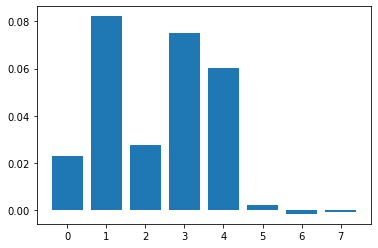

In [52]:
# perform permutation importance
results = permutation_importance(model4, X_train, y_train)
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Importance: %.4f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### 11.	Build machine learning model -5:

#### XGboost classifier model :
      XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.

d. Train a XGboost classifier model

In [53]:
# fit model training data
model5= XGBClassifier(n_estimators=10,
                               min_samples_split=20,
                               min_impurity_decrease=0.01)
model5.fit(X_train, y_train)

[14:16:09] WARNING: ..\src\learner.cc:576: 
Parameters: { "min_impurity_decrease", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:16:09] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1,
              min_impurity_decrease=0.01, min_samples_split=20, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

e. Find the train and the test score for the built model.

In [54]:
# Getting the accuracy on train data
train_accuracy = model5.score(X_train,y_train)
print("Accuracy of the model5 on train data = ",train_accuracy)

# Getting the accuracy on test data
test_accuracy = model5.score(X_test,y_test)
print("Accuracy of the model5 on test data = ",test_accuracy)

Accuracy of the model5 on train data =  0.9308270676691729
Accuracy of the model5 on test data =  0.8143712574850299


f. Based on this model, find the importance of each predictor.

Feature: 0, Importance: 0.0920
Feature: 1, Importance: 0.3230
Feature: 2, Importance: 0.0800
Feature: 3, Importance: 0.1236
Feature: 4, Importance: 0.0888
Feature: 5, Importance: 0.0859
Feature: 6, Importance: 0.1125
Feature: 7, Importance: 0.0942


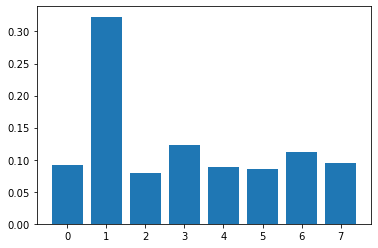

In [55]:
# get importance
importance = model5.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Importance: %.4f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

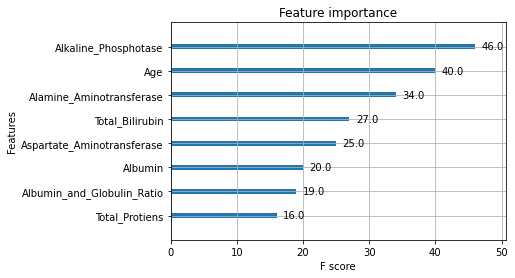

In [56]:
# The XGBoost library provides a built-in function to plot features ordered by their importance.
# The function is called plot_importance() and can be used as follows:
from xgboost import plot_importance
plot_importance(model5)
pyplot.show()

## 12. Compare the performance of all the 5 model build and suggest the best model

###### Accuracy :
            Model accuracy is a machine learning model performance metric that is defined as the ratio of true positives and true negatives to all positive and negative observations.
                                Accuracy = (TP + TN)/ (TP + FN + TN + FP)

##### Precision: 
            Model precision score represents the model’s ability to correctly predict the positives out of all the positive predictions it made.
                               Precision = TP / (FP + TP)

###### Recall:
    Model recall score represents the model’s ability to correctly predict the positives out of actual positives.
                               Recall Score = TP / (FN + TP)

###### F1 score : 
      Model F1 score represents the model score as a Harmonic function of precision and recall score. F-score is a machine learning model performance metric that gives equal weight to both the Precision and Recall for measuring its performance.
                               F1 Score = 2* Precision * Recall / (Precision + Recall)
                               
               where,
                  TP = TRUE POSITIVE
                  TN = TRUE NEGATIVE
                  FP = FALSE POSITIVE
                  FN = FALSE NEGATIVE

In [57]:
## Model 1 Logistic Regression

#predicting targets based on the model built
train_predictions_1 = model1.predict(X_train)
test_predictions_1 = model1.predict(X_test)


# Generating the report and printing the same
print(classification_report(y_test,test_predictions_1))

              precision    recall  f1-score   support

           1       0.73      0.59      0.65        87
           2       0.63      0.76      0.69        80

    accuracy                           0.67       167
   macro avg       0.68      0.67      0.67       167
weighted avg       0.68      0.67      0.67       167



In [58]:
## Model 2 Support vector machine

#predicting targets based on the model built
train_predictions_2 = model2.predict(X_train)
test_predictions_2 = model2.predict(X_test)


# Generating the report and printing the same
print(classification_report(y_test,test_predictions_2))

              precision    recall  f1-score   support

           1       0.73      0.54      0.62        87
           2       0.61      0.79      0.69        80

    accuracy                           0.66       167
   macro avg       0.67      0.66      0.66       167
weighted avg       0.68      0.66      0.65       167



In [59]:
## Model 3 Random forest classifier

#predicting targets based on the model built
train_predictions_3 = model3_a.predict(X_train)
test_predictions_3 = model3_a.predict(X_test)


# Generating the report and printing the same
print(classification_report(y_test,test_predictions_3))

              precision    recall  f1-score   support

           1       0.87      0.68      0.76        87
           2       0.72      0.89      0.79        80

    accuracy                           0.78       167
   macro avg       0.79      0.78      0.78       167
weighted avg       0.80      0.78      0.78       167



In [60]:
## Model 4 MLP classifier

#predicting targets based on the model built
train_predictions_4 = model4.predict(X_train)
test_predictions_4 = model4.predict(X_test)


# Generating the report and printing the same
print(classification_report(y_test,test_predictions_4))

              precision    recall  f1-score   support

           1       0.91      0.46      0.61        87
           2       0.62      0.95      0.75        80

    accuracy                           0.69       167
   macro avg       0.76      0.70      0.68       167
weighted avg       0.77      0.69      0.68       167



In [61]:
## Model 5 XG Boost classifier

#predicting targets based on the model built
train_predictions_5 = model5.predict(X_train)
test_predictions_5 = model5.predict(X_test)


# Generating the report and printing the same
print(classification_report(y_test,test_predictions_5))

              precision    recall  f1-score   support

           1       0.91      0.71      0.80        87
           2       0.75      0.93      0.83        80

    accuracy                           0.81       167
   macro avg       0.83      0.82      0.81       167
weighted avg       0.83      0.81      0.81       167



Model1 Logistic Regression     : 0.724465 (0.072889)
Model2 Support Vector Machine  : 0.667246 (0.080213)
Model3_a RandomForest Classifier : 0.838993 (0.052060)
Model4 MLP Classifier          : 0.694697 (0.081556)
[14:16:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:15] WARNING: ..\src\lea

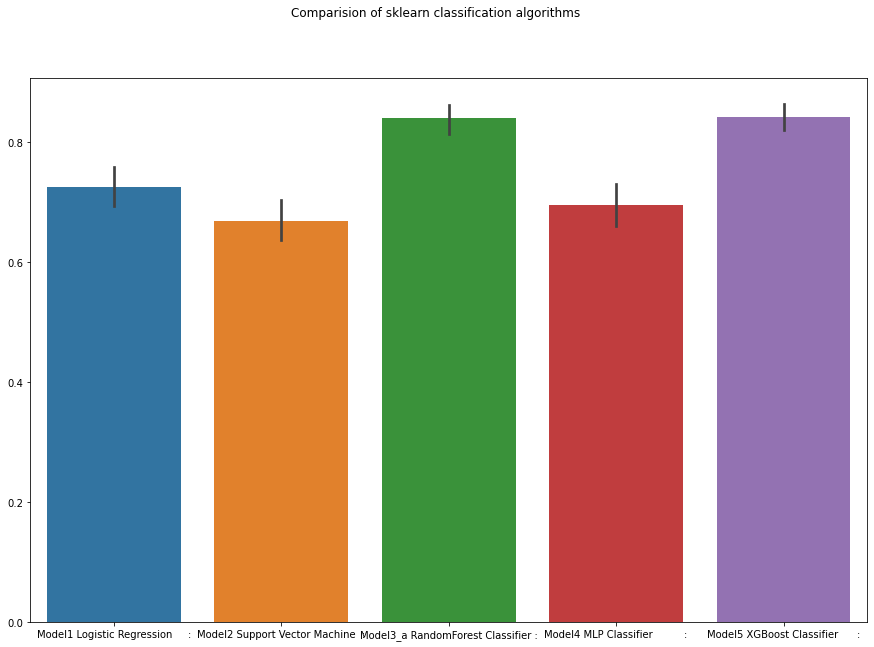

In [62]:
#K-Folds cross-validator

#Provides train/test indices to split data in train/test sets.Split dataset into k consecutive folds (without shuffling by default).
kfold = model_selection.KFold(n_splits=5)

# preparing models
models = []
models.append(('Model1 Logistic Regression     :', LogisticRegression()))
models.append(('Model2 Support Vector Machine  :',SVC()))
models.append(('Model3_a RandomForest Classifier :',RandomForestClassifier()))
models.append(('Model4 MLP Classifier          :',MLPClassifier()))
models.append(('Model5 XGBoost Classifier      :',XGBClassifier()))

# evaluating each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=20)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
         
# barplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparision of sklearn classification algorithms')
ax = fig.add_subplot(111)
sns.barplot(data=results)
ax.set_xticklabels(names)
plt.show() 

## Conclusion :

1. **By comparing all the models, Random Forest Classifier and XG boost Classifier models gives almost 85% accuracy both in train and test. we can see that the values of precision(nearly 0.9), recall(nearly 0.75) and f1 score(nearly 0.85) in both Diseased and Not Diseased for Random Forest Classifier and XG boost Classifier are much better than the remaining models.**

 
2. **So, we can conclude that these two models will give us the best predictions.**

##### We suggest to use any one of the Random Forest and XG boost Classifiers to the HEALTH CARE SYSTEM.

# -------------------------------------------------THE END--------------------------------------------------


***It’s our privilege to extend our gratitude to Seema Patil who supported, encouraged and led us in every aspect throughout the project with her immense patience and unconditional co-operation.***

**Mentor:** 
               Seema Patil

######                B3 Team :
                1. 1163368 - Korine Palli Tharun Kumar
                2. 1163369 - Sumanth Lellapalli
                3. 1163371 - Pavithra Jadapa
                4. 1163372 - Astha Malhotra 
                5. 1163373 - Sreeja Reddy Pasam
                6. 1163374 - Manav Gupta 
                7. 1163375 - Akbar Baba Valli Eruru
                8. 1163378 - Arava Sravani

**Contribution towards Project :**

As per the mentor's suggestions, we decided not to split the work and worked on the tasks individually so that we can have different approaches. And finally we discussed among ourselves and selected the best suited approach as our final answer.